<a href="https://colab.research.google.com/github/gupta-keshav/age_gender_classification/blob/master/alignedAgeSubmit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pip install patool
import patoolib
patoolib.extract_archive("/content/drive/My Drive/Adience/datasetAge.rar", outdir="/content")

patool: Extracting /content/drive/My Drive/Adience/datasetAge.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Adience/datasetAge.rar"
patool:     with cwd='/content'


PatoolError: ignored

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, PReLU, ReLU
from keras import optimizers, regularizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
np.random.seed(48)
from keras.applications import vgg19
from keras.models import Model
input_shape = (256, 256, 3)
vgg = vgg19.VGG19(include_top=False ,weights='imagenet', 
                                     input_shape=input_shape)   

In [0]:
last = vgg.output

In [21]:
x = Flatten()(last)
x = Dropout(0.3)(x)
x = Dense(4096, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1))(x)
x = Dropout(0.65)(x)

In [0]:
preds = Dense(8, activation = 'softmax')(x)

In [0]:
model = Model(vgg.input, preds)

In [24]:
import pandas as pd
layers = [(layer.output, layer.name, layer.trainable) for layer in model.layers]
pd.set_option('max_colwidth', -1)

pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,"Tensor(""input_2:0"", shape=(?, 256, 256, 3), dtype=float32)",input_2,False
1,"Tensor(""block1_conv1_1/Relu:0"", shape=(?, 256, 256, 64), dtype=float32)",block1_conv1,True
2,"Tensor(""block1_conv2_1/Relu:0"", shape=(?, 256, 256, 64), dtype=float32)",block1_conv2,True
3,"Tensor(""block1_pool_1/MaxPool:0"", shape=(?, 128, 128, 64), dtype=float32)",block1_pool,True
4,"Tensor(""block2_conv1_1/Relu:0"", shape=(?, 128, 128, 128), dtype=float32)",block2_conv1,True
5,"Tensor(""block2_conv2_1/Relu:0"", shape=(?, 128, 128, 128), dtype=float32)",block2_conv2,True
6,"Tensor(""block2_pool_1/MaxPool:0"", shape=(?, 64, 64, 128), dtype=float32)",block2_pool,True
7,"Tensor(""block3_conv1_1/Relu:0"", shape=(?, 64, 64, 256), dtype=float32)",block3_conv1,True
8,"Tensor(""block3_conv2_1/Relu:0"", shape=(?, 64, 64, 256), dtype=float32)",block3_conv2,True
9,"Tensor(""block3_conv3_1/Relu:0"", shape=(?, 64, 64, 256), dtype=float32)",block3_conv3,True


In [0]:
for i in range(17):
  model.layers[i].trainable = False

In [0]:
model.compile(optimizer = optimizers.Adam(lr=1e-4), loss= 'categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
        '/content/datasetAge/train',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
validate_generator = train_datagen.flow_from_directory(
        '/content/datasetAge/test',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')



Found 13840 images belonging to 8 classes.
Found 3676 images belonging to 8 classes.


In [28]:
history = model.fit_generator(train_generator, steps_per_epoch=440, epochs=4, verbose=1, callbacks=None, validation_data=validate_generator, validation_steps=110, validation_freq=1, class_weight=None, max_queue_size=10, workers=-1, use_multiprocessing=True, shuffle=False)

Epoch 1/4
440/440 [==============================] - 383s 871ms/step - loss: 8839.6368 - acc: 0.3501 - val_loss: 172.7745 - val_acc: 0.4043
Epoch 2/4
440/440 [==============================] - 439s 998ms/step - loss: 172.4483 - acc: 0.4349 - val_loss: 171.5213 - val_acc: 0.4932
Epoch 3/4
440/440 [==============================] - 443s 1s/step - loss: 171.3695 - acc: 0.4952 - val_loss: 171.3732 - val_acc: 0.5040
Epoch 4/4
440/440 [==============================] - 434s 986ms/step - loss: 170.3585 - acc: 0.5592 - val_loss: 170.1601 - val_acc: 0.5472


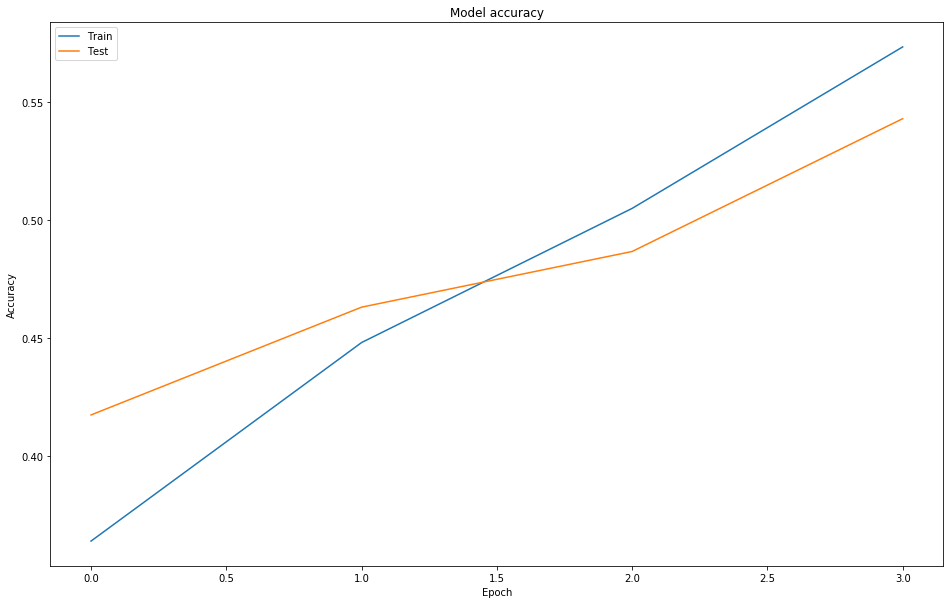